In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Question 1

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Question 2

In [54]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=1).fit(X_train,y_train)
print('Score: ',svm.score(X_test,y_test))

Score:  0.8601398601398601


/usr/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.model_selection import validation_curve
C_range = np.logspace(-6,-2,50)
train_scores, valid_scores = validation_curve(LinearSVC(), X_train, y_train, "C", C_range, cv=10)

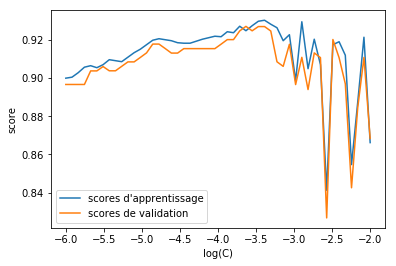

In [58]:
train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)
plt.plot(np.log10(C_range),train_scores_mean,label="scores d'apprentissage")
plt.plot(np.log10(C_range),valid_scores_mean,label="scores de validation")
plt.legend()
plt.xlabel('log(C)')
plt.ylabel('score')
plt.show()

In [59]:
C_best = C_range[np.argmax(valid_scores_mean)]
svm = LinearSVC(C=C_best).fit(X_train,y_train)
print('Score:', svm.score(X_test,y_test))
y_test_predict = svm.predict(X_test)

Score: 0.9440559440559441


/usr/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Question 3

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test,y_test_predict)
print(confusion_matrix_test)

[[40  7]
 [ 1 95]]


In [61]:
tp = confusion_matrix_test[0,0]
fp = confusion_matrix_test[1,0]
fn = confusion_matrix_test[0,1]
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print('Recall :', recall)
print('Precision :', precision)

Recall : 0.851063829787234
Precision : 0.975609756097561


In [62]:
from sklearn.metrics import recall_score, precision_score
print('Recall: ',recall_score(y_test,y_test_predict,pos_label=0))
print('Precision: ',precision_score(y_test,y_test_predict,pos_label=0))

Recall:  0.851063829787234
Precision:  0.975609756097561


# Question 4

In [63]:
def false_positive_rate(y_true,y_predict,pos_label):
    return np.sum(y_true[y_predict == pos_label] != pos_label)/np.sum(y_true != pos_label)

In [64]:
print(false_positive_rate(y_test,y_test_predict,0))

0.010416666666666666


# Question 5

In [65]:
def modified_predictor(X,tau):
    return (svm.decision_function(X) >= tau).astype('int')

# Question 6

Un très mauvais prédicteur a un rappel (taux de vrais positifs) à
peine plus élevé que le taux de faux positifs: la courbe ROC n'est
donc que légèrement au-dessus de la diagonale (courbe de coordonnées
$(t,t)$ pour $t\in [0,1]$). Pour un bon prédicteur en revanche, la
courbe ROC passe nettement au-dessus de la diagonale.

# Question 7

In [66]:
decision_function_train = svm.decision_function(X_train)
tau_range = np.linspace(np.min(decision_function_train),np.max(decision_function_train),100)

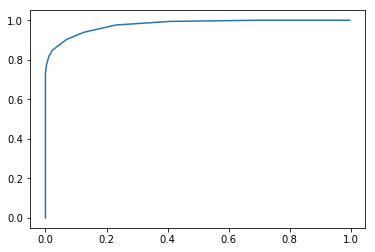

In [67]:
recalls = []
fprs = []
for tau in tau_range:
    y_train_predict = modified_predictor(X_train,tau)
    recalls.append(recall_score(y_train,y_train_predict,pos_label=0))
    fprs.append(false_positive_rate(y_train,y_train_predict,0))

plt.plot(fprs,recalls)
plt.show()

# Question 8

In [68]:
recalls_array = np.array(recalls)
fprs_array = np.array(fprs)

good_enough_recalls_index = (recalls_array >= .95)
tau_best = (tau_range[good_enough_recalls_index])[np.argmin(fprs_array[good_enough_recalls_index])]

y_test_predict = modified_predictor(X_test,tau_best)

from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_test_predict))
print('Recall: ', recall_score(y_test, y_test_predict,pos_label=0))
print('Precision: ', precision_score(y_test, y_test_predict,pos_label=0))
print('False positive rate: ', false_positive_rate(y_test, y_test_predict,pos_label=0))

Accuracy score:  0.8251748251748252
Recall:  0.9787234042553191
Precision:  0.6571428571428571
False positive rate:  0.25
